# 1 Développement d'un perceptron


In [3]:
import numpy as np
import matplotlib.pyplot as plt

from random import randint, choice
from pylab import *

exemple hors projet

### 1.1 Mise en place d'un perceptron simple

In [4]:
# la variable w contient les poids synaptiques du neurone (vecteur à 3 lignes, la première ligne correspond à au seuil)
# la variable x contient 
def perceptron_simple(x, w, active):
    x0 = np.concatenate(([1], x)) # x0 = 1
    v = np.sum(np.multiply(x0, w))

    if active == 0:
        return np.sign(v)
    elif active == 1:
        return np.tanh(v)   

In [5]:
# UTILS

# Affichage des entrées sous forme de graphique
def getClass(p):
  if p >= 0:
    return 'g'
  else:
    return 'r'

# Affichage des entrées sous forme de graphique avec plusieurs classes
def getClass(p, classes = [-1, 1]):
  if p == classes[0]:
    return 'g'
  elif p == classes[1]:
    return 'r'
  elif p == classes[2]:
    return 'b'
  elif p == classes[3]:
    return 'y'
  elif p == classes[4]:
    return 'c'

# afficher la droite séparatrice associée aux poids du neurone
def droite_separatrice(X, YD, w, xmin = -2, xmax = 2, ymin = -2, ymax = 2, titre = '', classes = [-1, 1]):
  x = np.linspace(xmin,xmax,50)
  y = (w[0] + x*w[1]) / (-w[2])

  # la grille
  plt.xlim(xmin,xmax)
  plt.ylim(ymin,ymax)

  # affichage des points
  for p in range(len(YD)):
      plt.plot(X[p][0], X[p][1], getClass(YD[p], classes) + 'o')

  plt.title(titre)
  plt.plot(x, y)
  plt.grid()
  plt.show()



Test du perceptron avec l'exemple du OU logique vu en cours (phi(x) = sign(x))

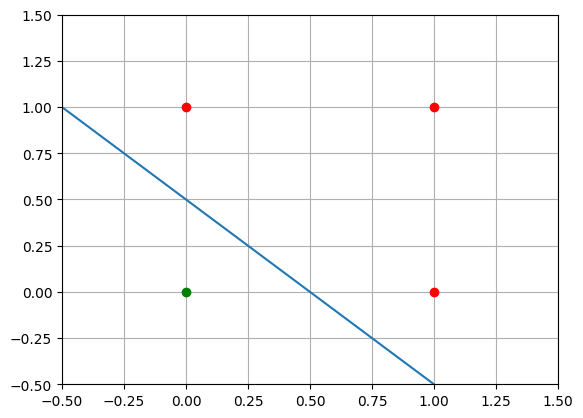

In [6]:
# Test perceptron simple sur la porte OU

# poids
w = np.array([-0.5, 1, 1])

# entrées
x = np.array([[0,0], [0,1], [1,0], [1,1]])

# sortie
res = []
for i in range(4) :
  res.append(perceptron_simple(x[i], w, 0))

droite_separatrice(x, res, w, -0.5, 1.5, -0.5, 1.5)

### 1.2 Etude de l'apprentissage
#### 1.2.1 Programmation apprentissage Widrow-hoff

In [7]:
# x contient l'ensemble d'apprentissage (matrice à 2 lignes et n colonnes).
# yd[i] indique la réponse désirée pour chaque élément x[:,i]. yd est un vecteur à 1 ligne et n colonnes de valeurs -1 ou +1 (classification à 2 classes).
# epoch le nomble d'itérations sur l'ensemble d'apprentissage.
# batch_size le nombre d'individus de l'ensemble d'apprentissage traités avant mise à jour des poids 
def apprentissage_widrow(x, yd, epoch, batch_size) :
    w = np.random.rand(len(x[0]) + 1) * 2 - 1 # w contient les poids synaptiques du neurone après apprentissage (vecteur à 3 lignes, dont la première ligne correspond à au seuil)
    erreur = np.zeros((epoch)) # l'erreur cumulée calculée pour passage complet sur l'ensemble d'apprentissage (somme (yd(i) - y(i))²). La variable erreur est donc un vecteur de taille égale au nombre d'itération.
    alpha = 0.1 # le coefficient d'apprentissage

    droite_separatrice(x, yd, w, -5, 5, -5, 5, 'Droite séparatrice initiale')

    for i in range(epoch):
        tmp_w = w
        erreur[i] = 0
        for j in range(len(x)):
            y = perceptron_simple(x[j], w, 1)
            erreur[i] += (yd[j] - y) ** 2
            tmp_w += alpha * (yd[j] - y) * np.concatenate(([1], x[j]))

            # mise à jour des poids à chaque batch_size
            if (j % batch_size) == 0:
                w = tmp_w
        
        # affichage de la droite séparatrice associée aux poids du neurone
        titre = 'Itération ' + str(i+1) + '\nerreur cumulée = ' + str(erreur[i])
        droite_separatrice(x, yd, w, -5, 5, -5, 5, titre)

        if erreur[i] == 0:
            break

    return w, erreur 

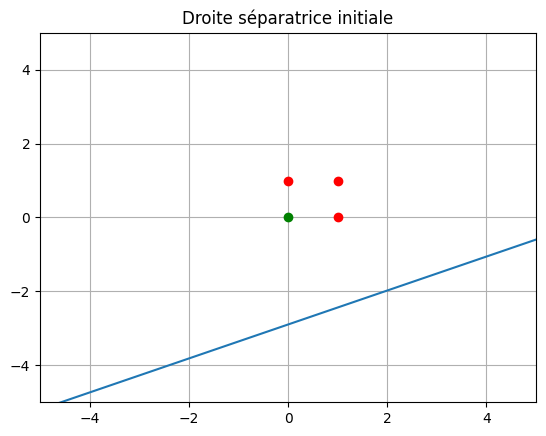

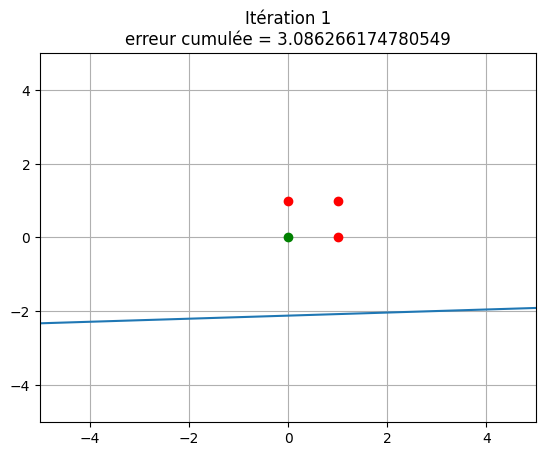

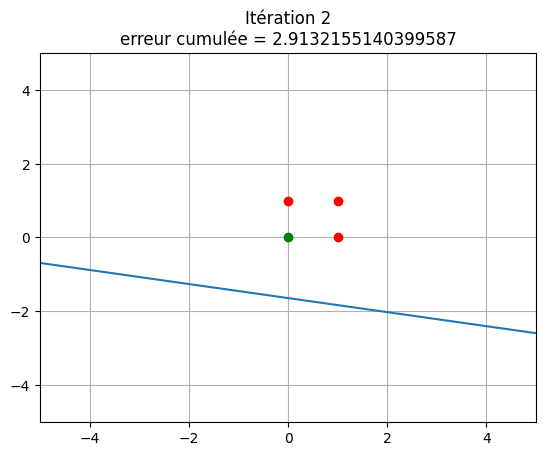

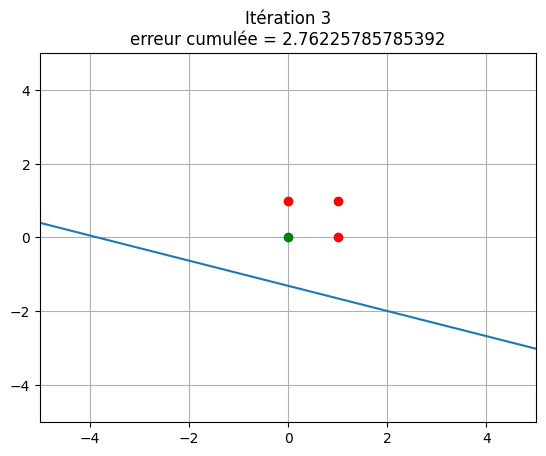

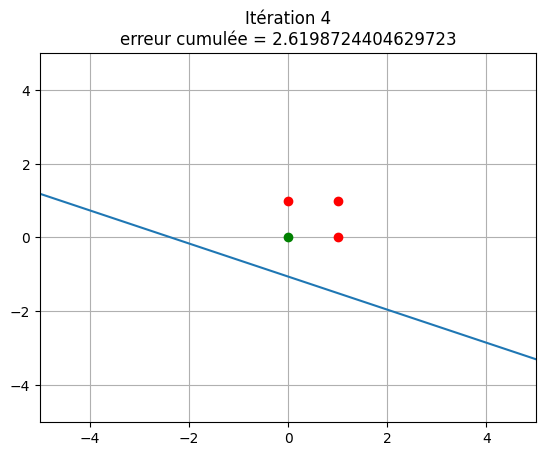

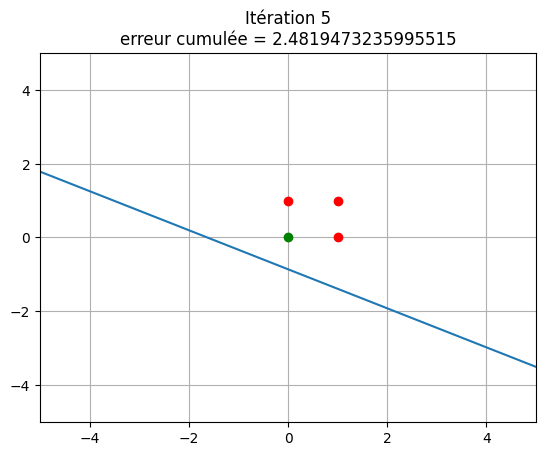

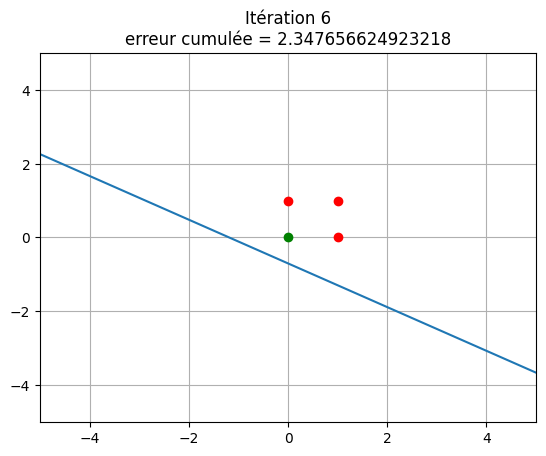

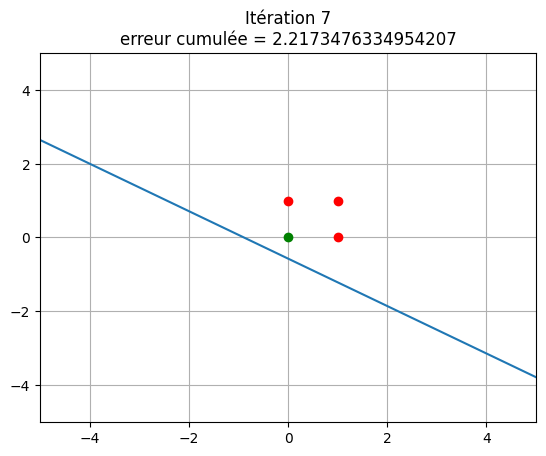

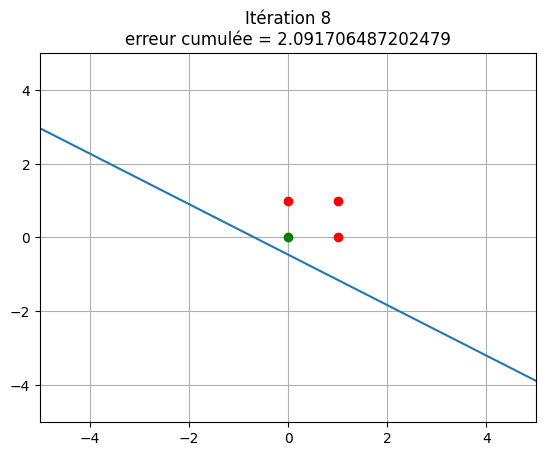

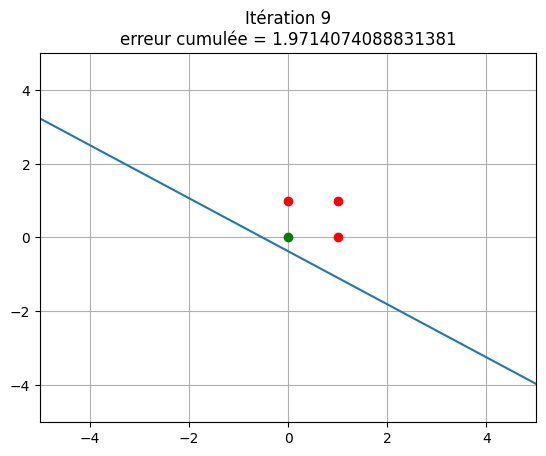

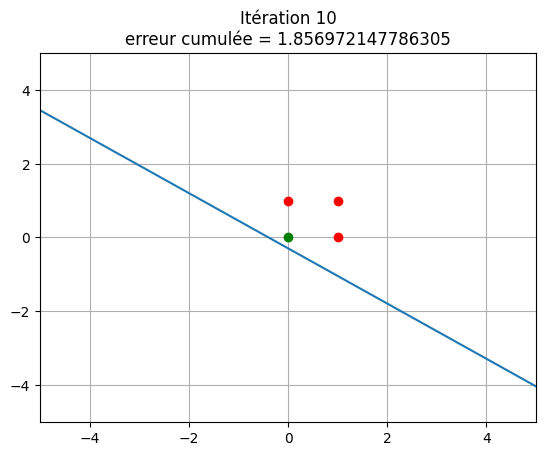

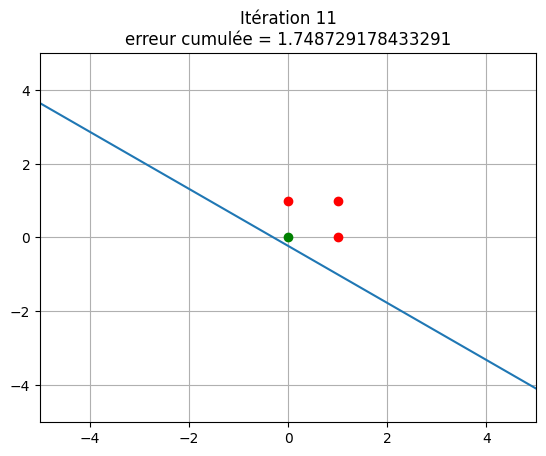

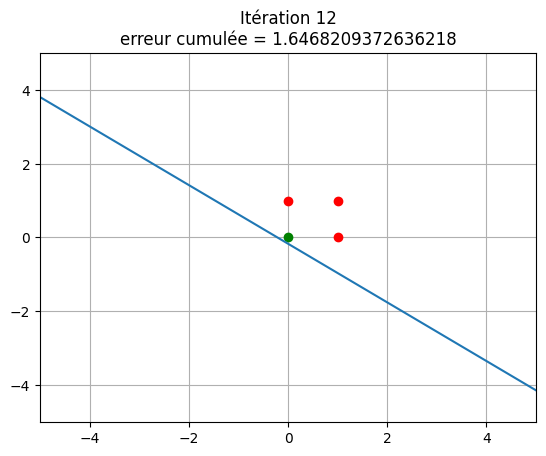

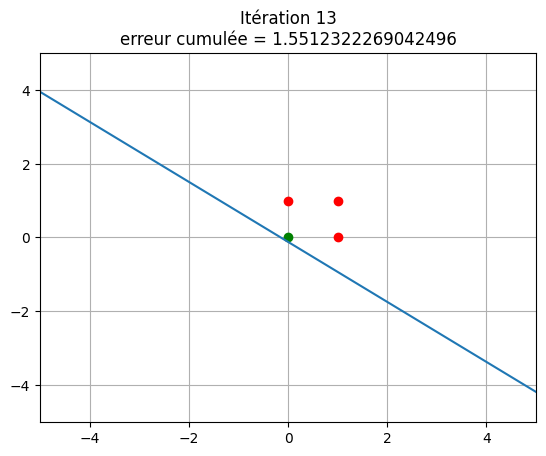

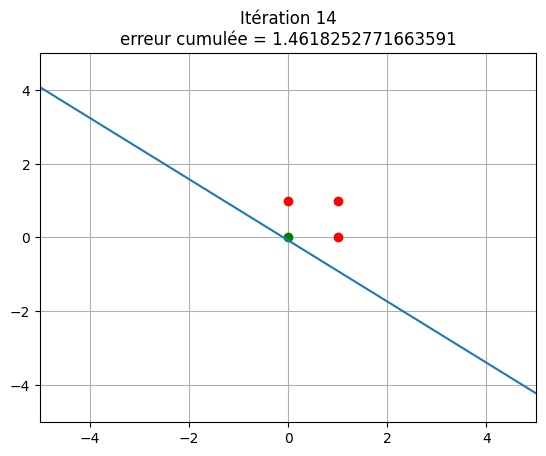

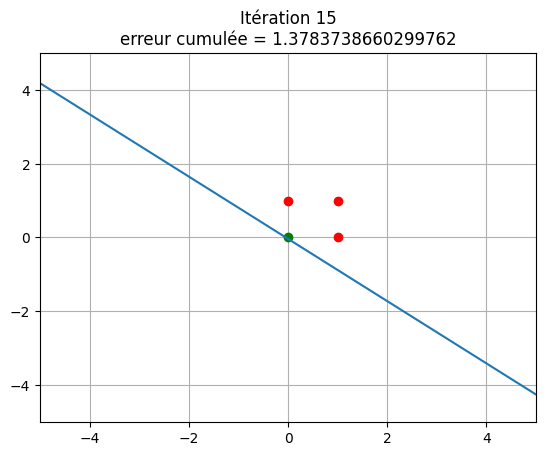

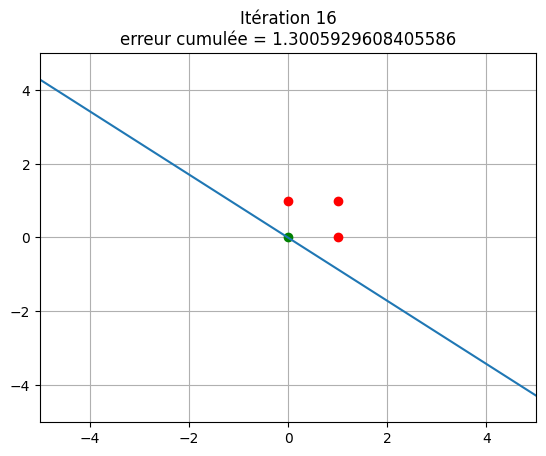

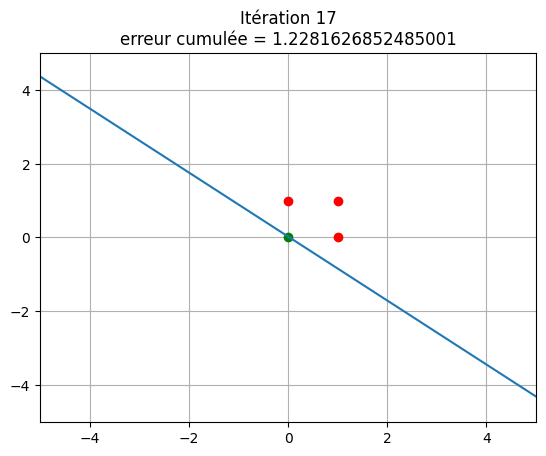

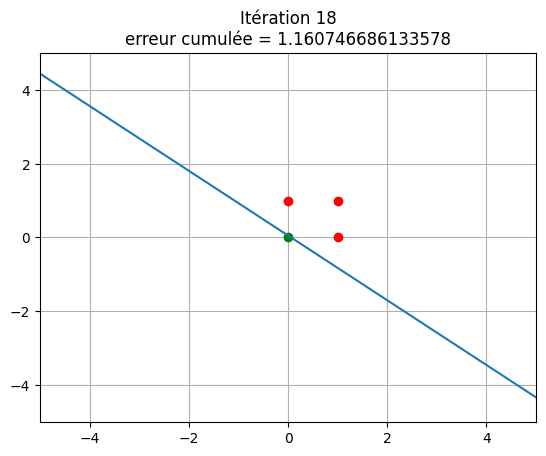

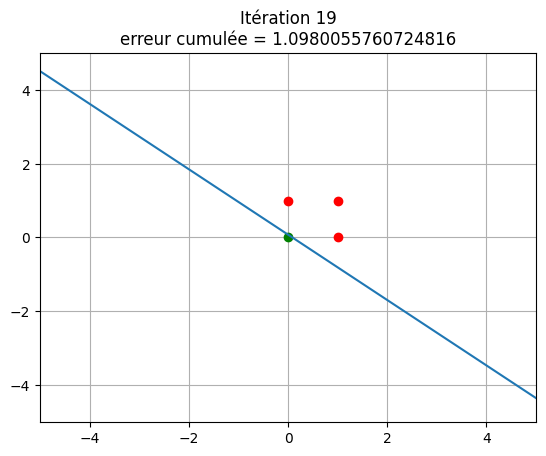

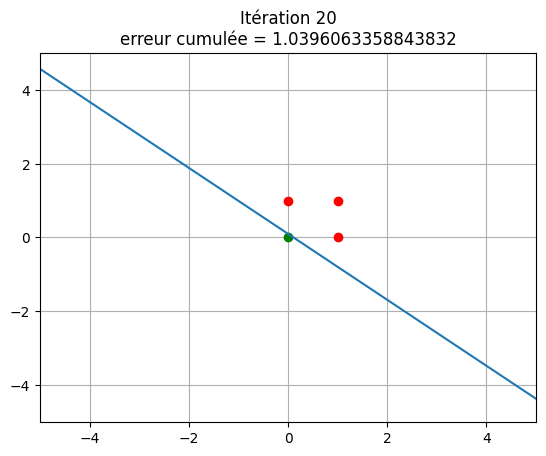

In [34]:
# test pour le OU
x = np.array([[0,0], [0,1], [1,0], [1,1]])
yd = np.array([-1, 1, 1, 1])

w, erreur = apprentissage_widrow(x, yd, 20, 2)

### 1.2.2 Test 1 simple


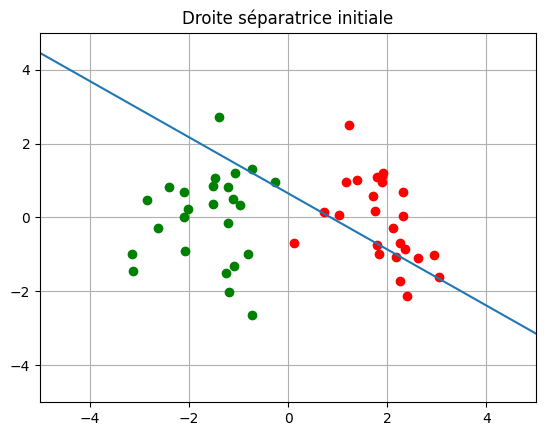

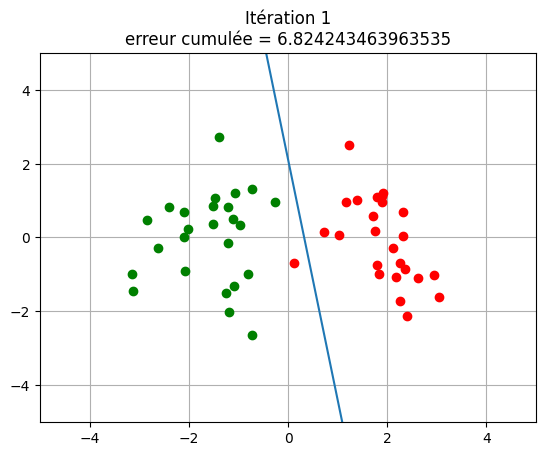

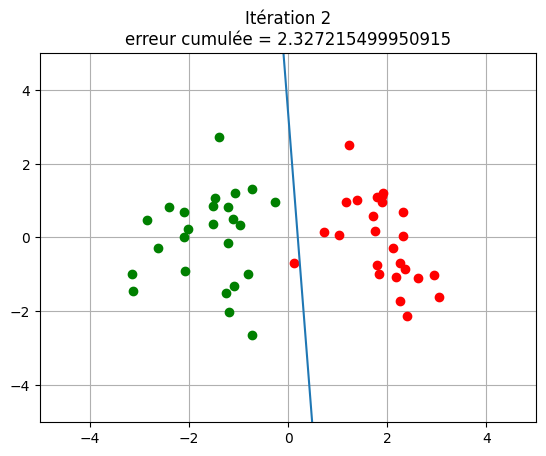

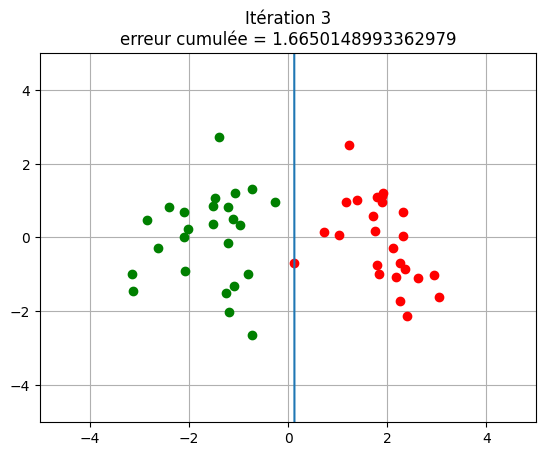

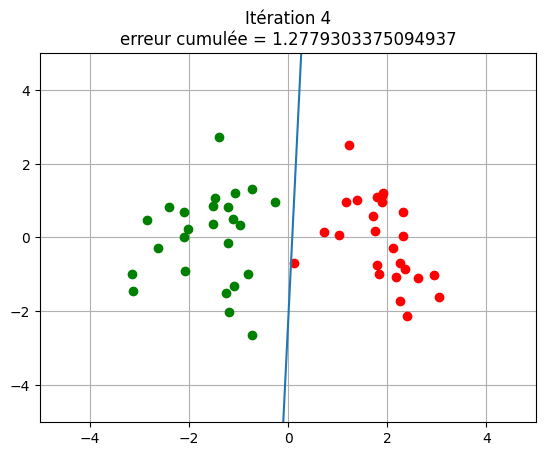

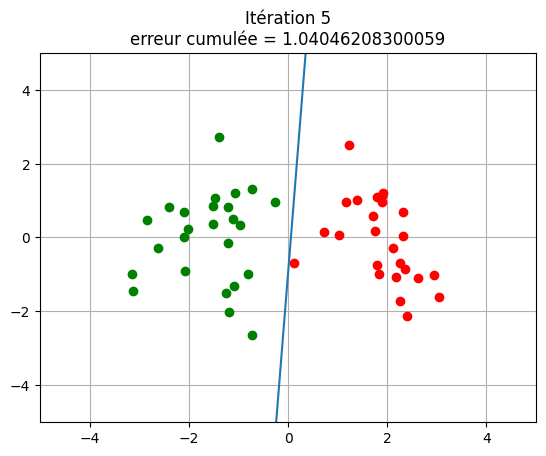

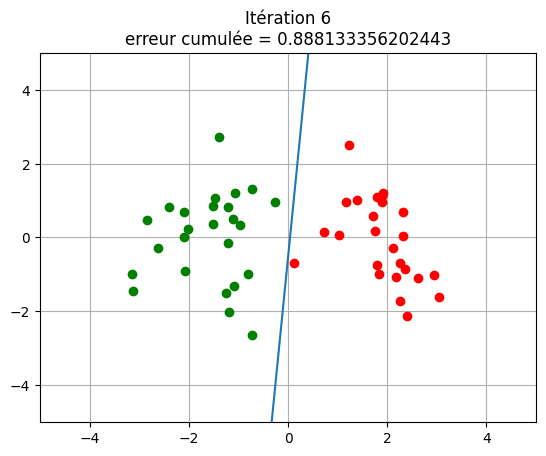

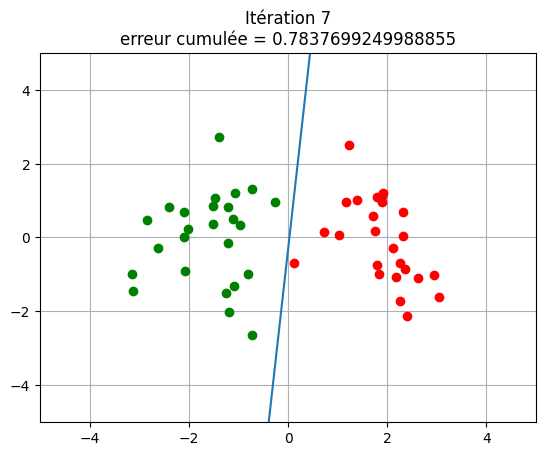

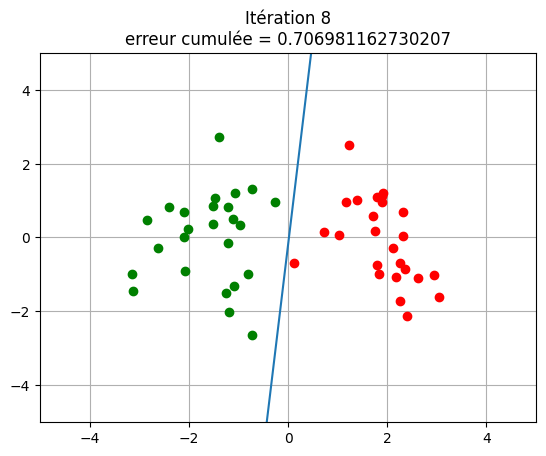

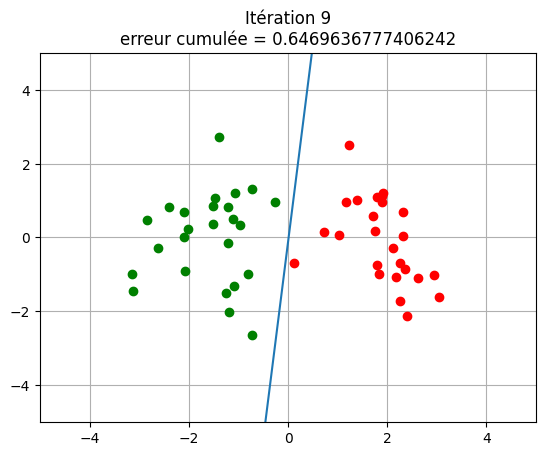

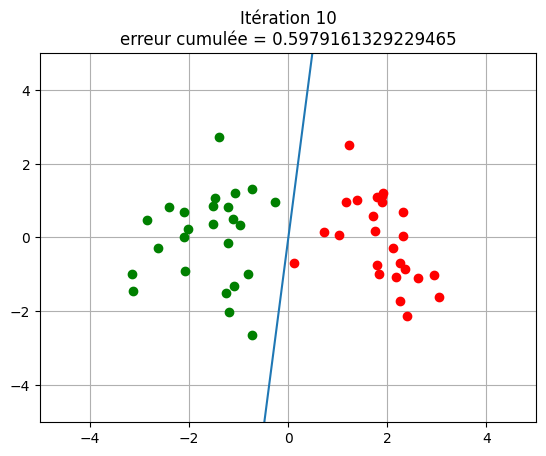

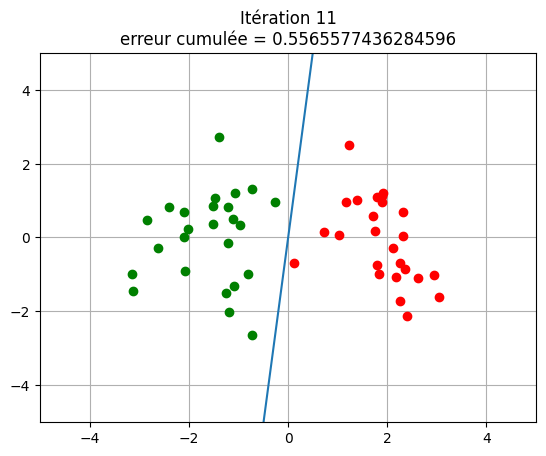

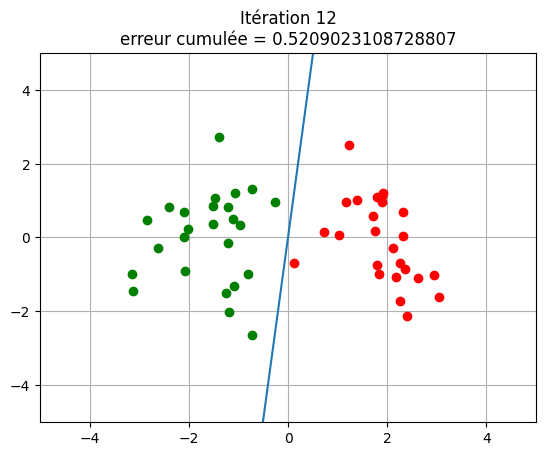

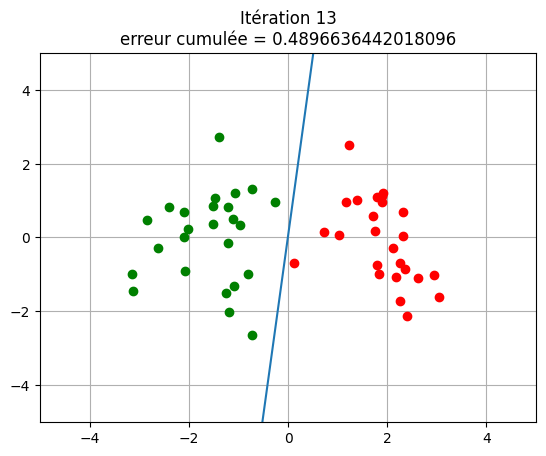

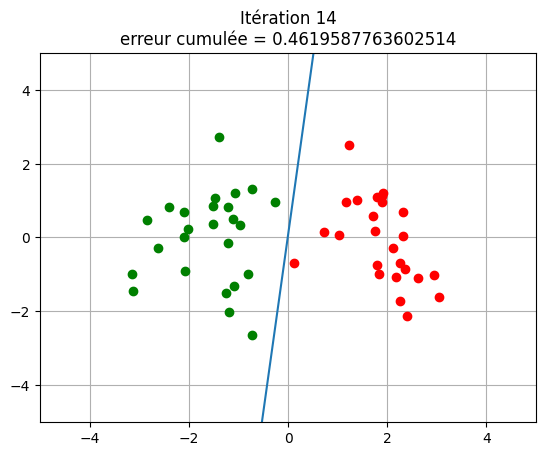

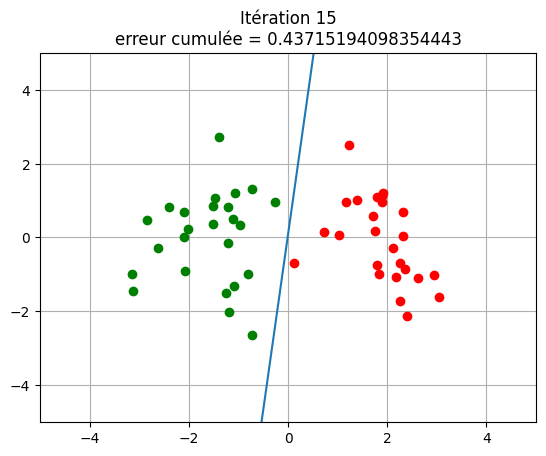

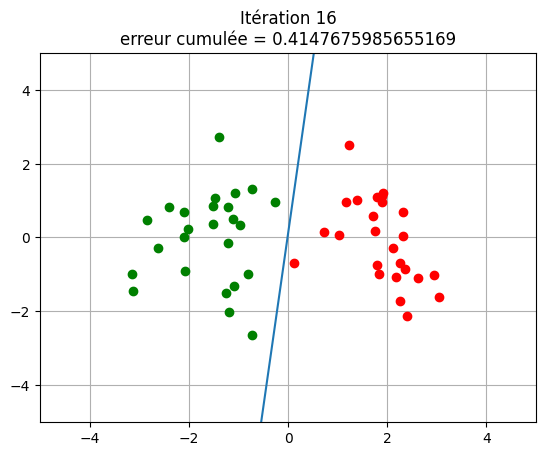

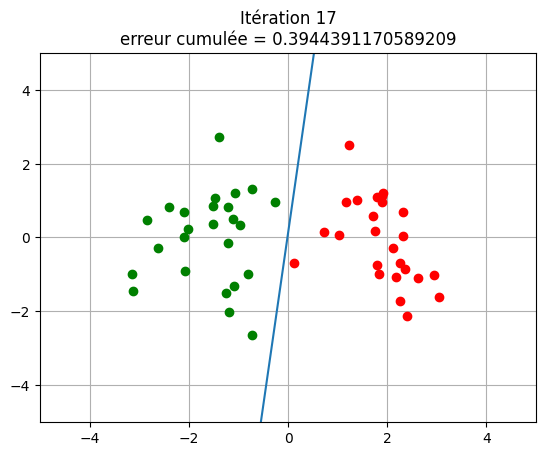

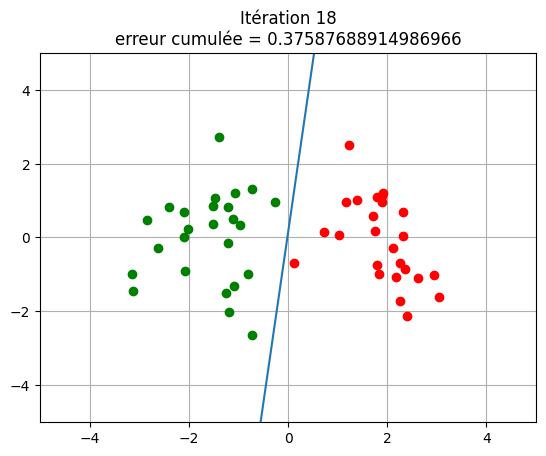

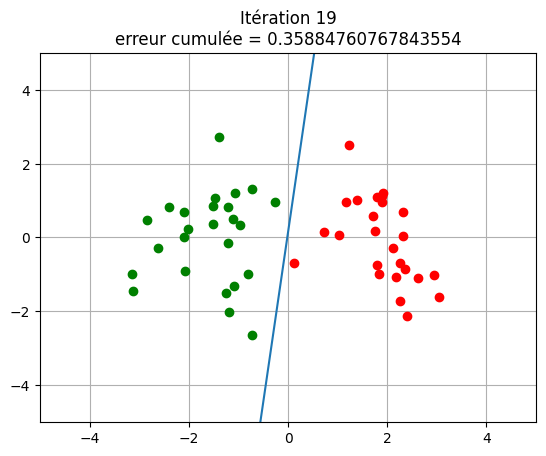

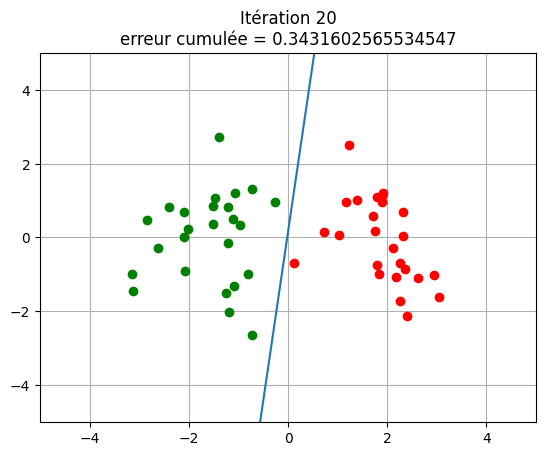

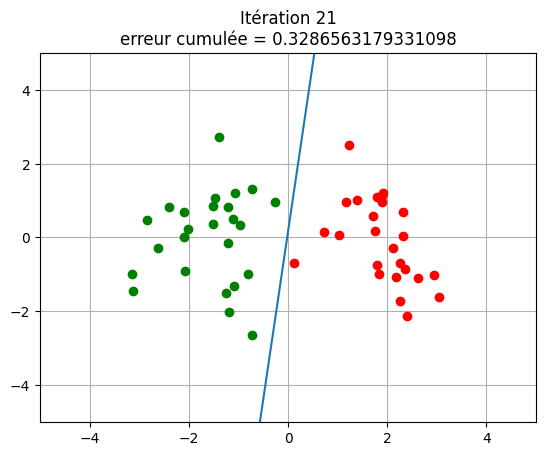

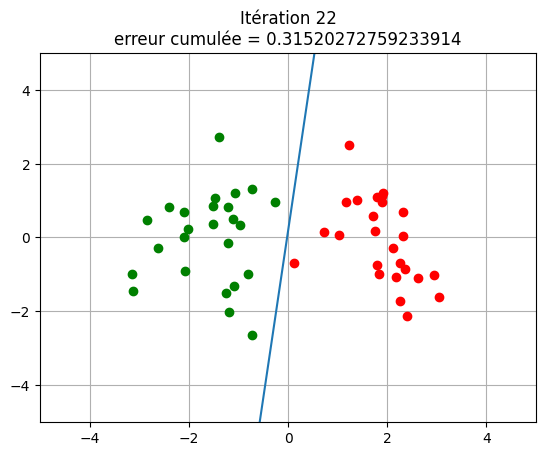

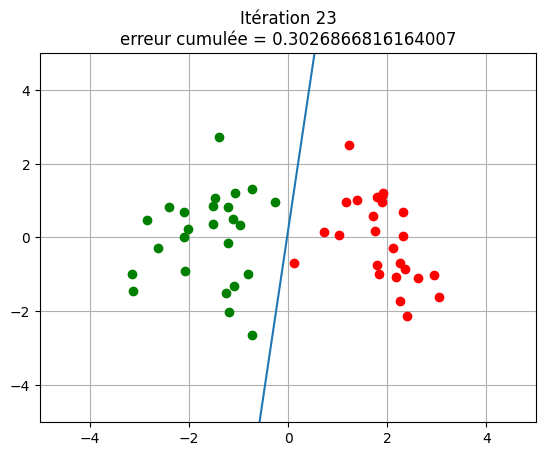

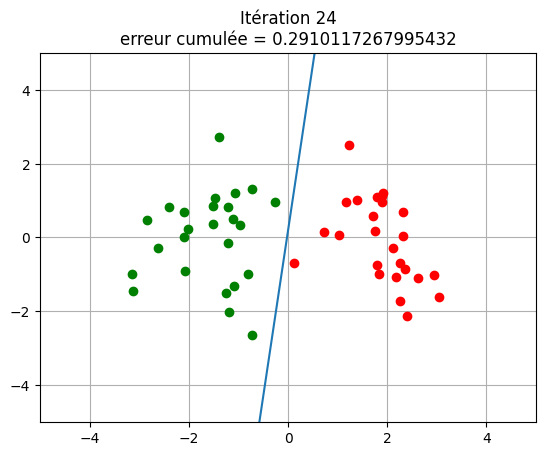

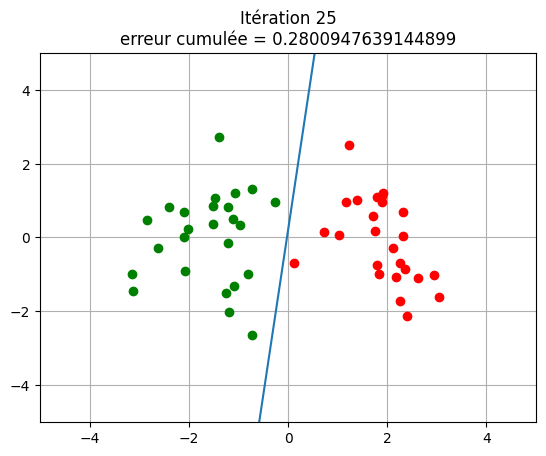

w :  [ 0.0693267   3.00345479 -0.33643363] 
erreur :  [6.82424346 2.3272155  1.6650149  1.27793034 1.04046208 0.88813336
 0.78376992 0.70698116 0.64696368 0.59791613 0.55655774 0.52090231
 0.48966364 0.46195878 0.43715194 0.4147676  0.39443912 0.37587689
 0.35884761 0.34316026 0.32865632 0.31520273 0.30268668 0.29101173
 0.28009476]


In [9]:
# load data p2_d1.txt
data = np.loadtxt('./data/p2_d1.txt')
x = list(map(list,zip(data[0],data[1])))
yd = [-1]*25 + [1]*25

# application de l'algorithme de Widrow-Hoff
w, erreur = apprentissage_widrow(x, yd, 25, 5)
print("w : ", w, "\nerreur : ", erreur)

### 1.2.3 Test 2

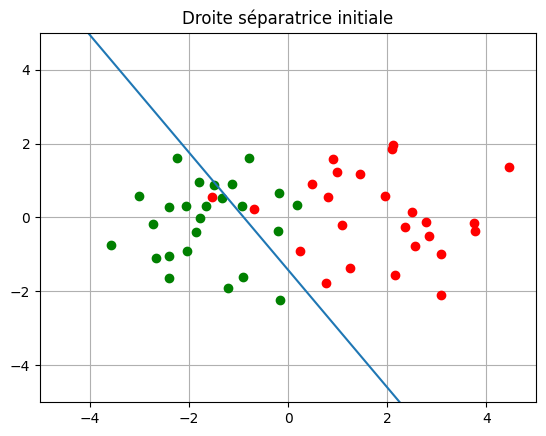

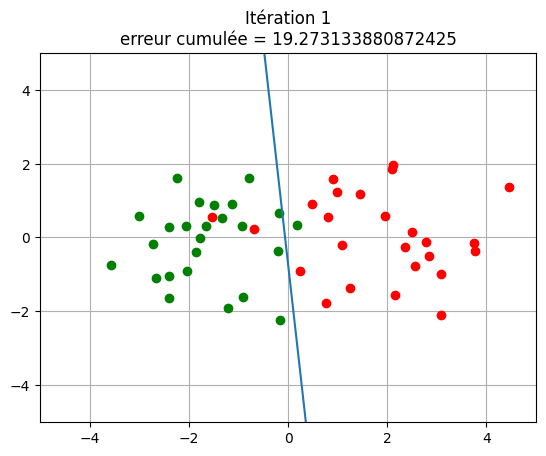

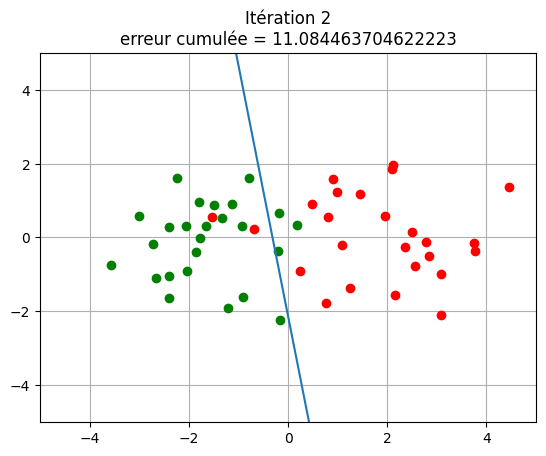

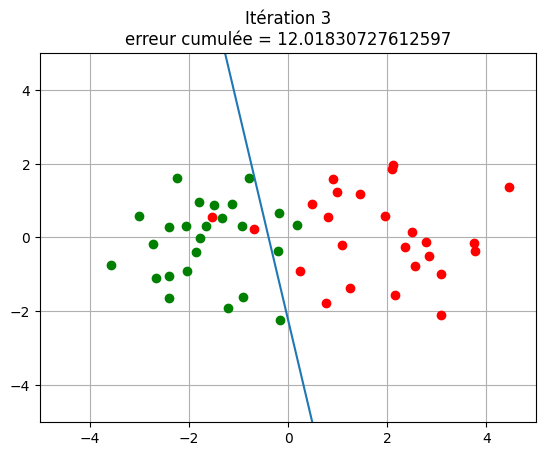

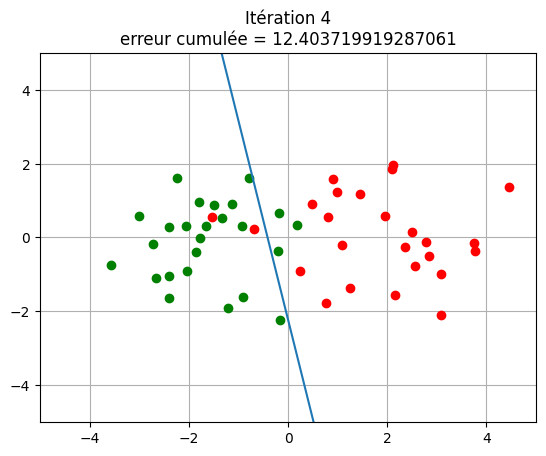

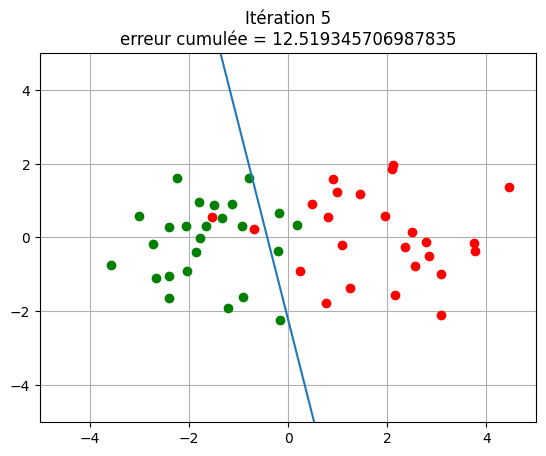

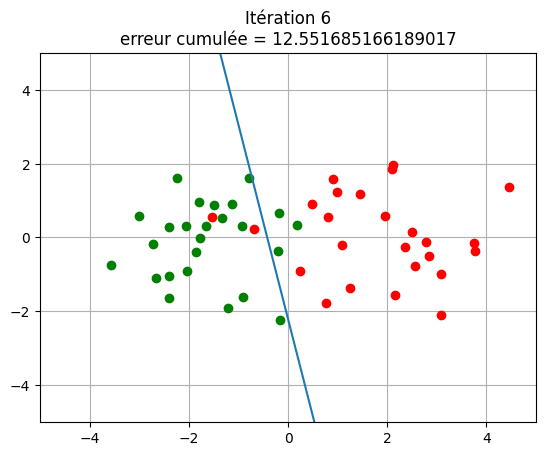

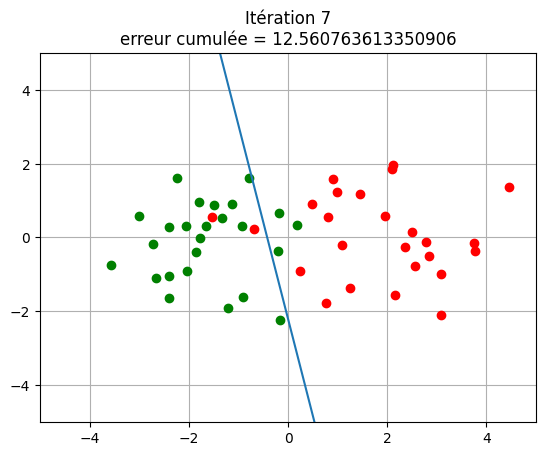

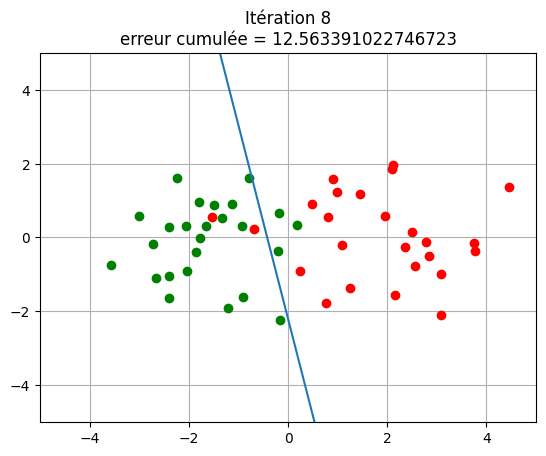

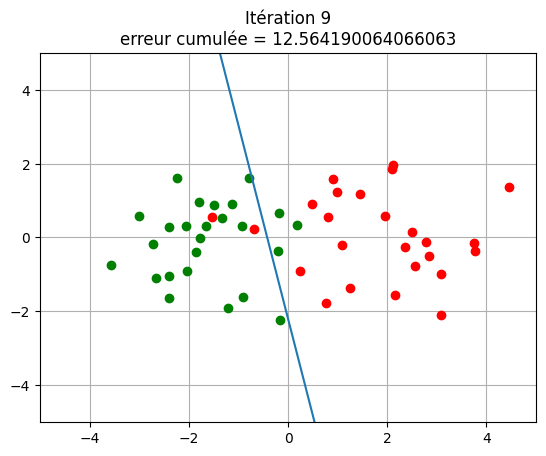

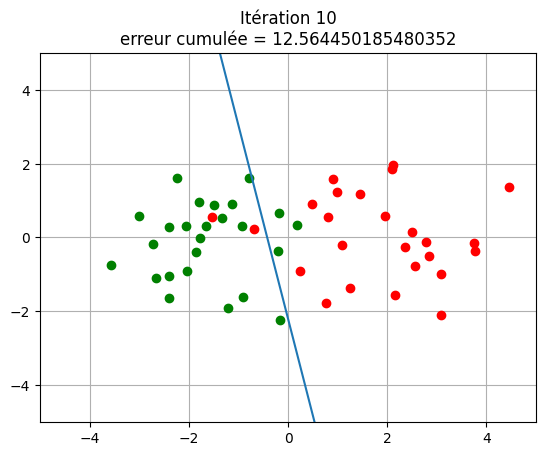

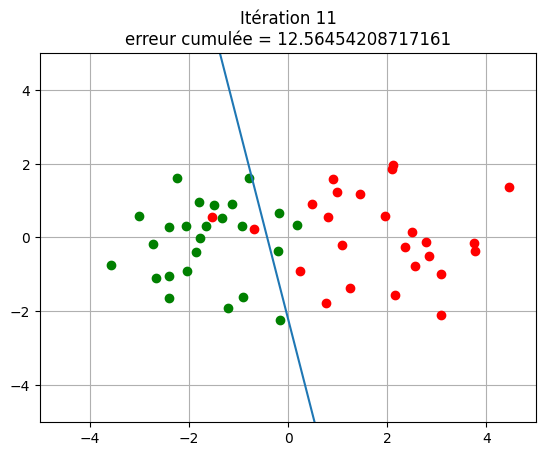

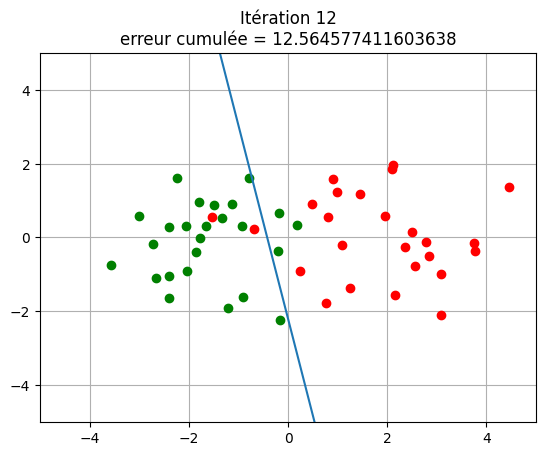

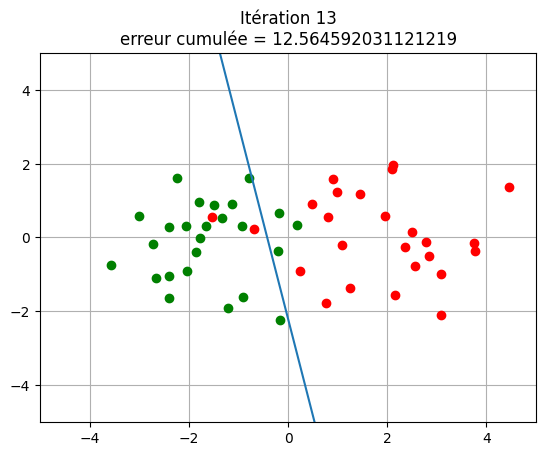

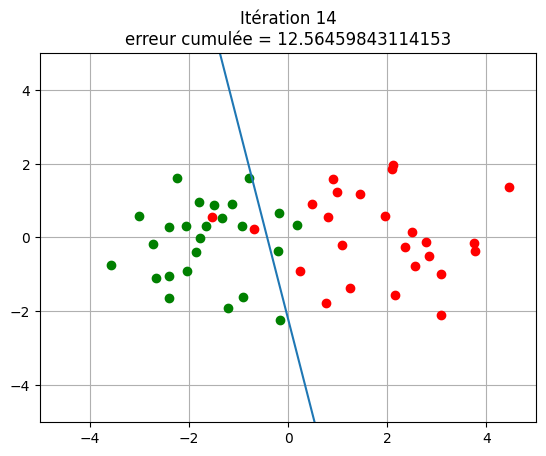

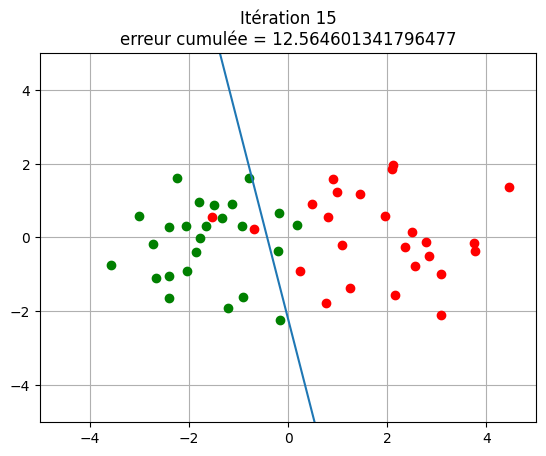

w :  [0.43725475 1.03777382 0.19838819] 
erreur :  [19.27313388 11.0844637  12.01830728 12.40371992 12.51934571 12.55168517
 12.56076361 12.56339102 12.56419006 12.56445019 12.56454209 12.56457741
 12.56459203 12.56459843 12.56460134]


In [10]:
# load data p2_d2.txt
data = np.loadtxt('./data/p2_d2.txt')
x = list(map(list,zip(data[0],data[1])))
yd = [-1]*25 + [1]*25

# application de l'algorithme de Widrow-Hoff
w, erreur = apprentissage_widrow(x, yd, 15, 5)
print("w : ", w, "\nerreur : ", erreur)

## 1.3 Perceptron multicouches
### 1.3.1 Mise en place d’un perceptron multicouche

In [13]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def perceptron(x, w, activation_function): # comme perceptron_simple mais avec une fonction d'activation en paramètre
    return activation_function(np.dot(w, np.concatenate(([1], x))))

def multiperceptron(x,w1,w2):
    y1 = perceptron(x, w1[:, 0], sigmoid)
    y2 = perceptron(x, w1[:, 1], sigmoid)

    res_couche_cachee = np.array([y1, y2])
    y = perceptron(res_couche_cachee, w2, sigmoid)
    return y

In [14]:
# test
x  = np.array([1, 1])
w1 = np.array([[-0.5, 0.5], [2.0, 0.5], [-1.0, 1.0]])
w2 = np.array([2.0, -1.0, 1.0])

print(multiperceptron(x, w1, w2))

0.9053673095402572


### 1.3.2 Programmation apprentissage multicouches

In [31]:
def multiperceptron_widrow(x,yd,Epoch,Batch_size):



    
    w1 = np.random.rand(len(x[0]) + 1, 2) * 2 - 1
    w2 = np.random.rand(3) * 2 - 1
    erreur = np.zeros((Epoch))
    alpha = 0.5

    for i in range(Epoch):
        tmp_w1 = w1
        tmp_w2 = w2
        erreur[i] = 0
        for j in range(len(x)):
            y = multiperceptron(x[j], w1, w2)
            
            erreur[i] += (yd[j] - y) ** 2
            #tmp_w2 += alpha * (yd[j] - y) * np.concatenate(([1], perceptron(x[j], w1, sigmoid)))

            #tmp_w1 += alpha * (yd[j] - y) * np.concatenate(([1], x[j])) * w2[1:] * perceptron(x[j], w1, sigmoid) * (1 - perceptron(x[j], w1, sigmoid))

            if (j % Batch_size) == 0:
                w1 = tmp_w1
                w2 = tmp_w2

        # affichage de la droite séparatrice associée aux poids du neurone
        titre = 'Itération ' + str(i+1) + '\nerreur cumulée = ' + str(erreur[i])
        
        
        if erreur[i] == 0:
            break

    return w1, w2, 

In [32]:
# test avec le XOR  
x = np.array([[0,0], [1,0], [0,1], [1,1]])
yd = np.array([-1, 1, 1, -1])w2

w1, w2, erreur = multiperceptron_widrow(x, yd, 20, 2)

w1 :  [[ 0.19751707 -0.71435968]
 [ 0.95580387 -0.08354457]
 [-0.07693128 -0.60265206]]
w2 :  [-0.60822231 -0.10848103  0.21478595]


ValueError: operands could not be broadcast together with shapes (3,2) (3,) 